# Introduction

The dataset `tennis_stats.csv` is taken from the men’s [Association of Tennis Professionals](https://www.atptour.com/en) (ATP). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

## Objective

This project explores how various features of a dataset can be used to predict player winnings for a given year using linear regression models. The analysis includes single-feature, two-feature, and multi-feature models to understand the impact of different variables on player earnings.

## Dataset
The dataset used in this project includes information on tennis players, their performance metrics, and their earnings for a given year. Key features in the dataset include:
- Aces (number of aces served)
- DoubleFaults (number of double faults)
- FirstServe (percentage of successful first serves)
- FirstServePointsWon (percentage of points won on first serve)

## Methodology
The analysis involves the following steps:
1. Feature Selection: Identifying relevant features for the models.
2. Model Training: Building and training linear regression models.
3. Model Evaluation: Assessing the performance of the models using metrics such as R-squared and Mean Squared Error (MSE).

---

# Exploratory Data Analysis

First we import necessary libraries, then take a look at the dataset head to see what we are working with.

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [198]:
df = pd.read_csv('tennis_stats.csv')
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

After an initial look at the data, I would like to explore how various factors affect the winnings of a player. I will be looking at the following factors:
1. Aces (higher number indicates a strong serve)
2. Break Points Opportunities i.e. the number of times a player has had the opportunity to break the opponent's serve  (higher number indicates a strong return)
3. Total Points Won (higher number indicates a strong overall game)

These factors align with the perceived best attributes of some of the best players in the world. For example, the top ranked player in the dataset is Marin Cilic, who is known for his strong serve. The next best player, Alexander Zverev, is known for his strong return game.

It is worth noting that there are two main types of data in the set: absolute values and percentages:
- Absolute values: Winnings, Aces, Break Points Opportunities, Double faults etc.
- Percentages: Service Games Won, Return Games Won, Total Points Won etc.


## Winnings vs Aces

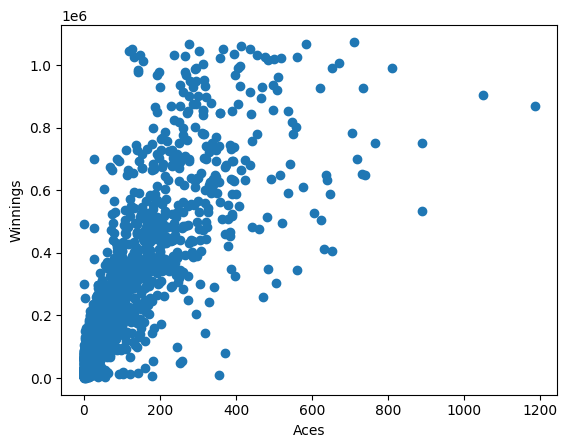

In [199]:
plt.scatter(df['Aces'], df['Winnings'])

plt.xlabel('Aces')
plt.ylabel('Winnings')

plt.show()

This graph suggests a positive correlation between the number of aces and the winnings of a player.

## Winnings vs Break Points Opportunities

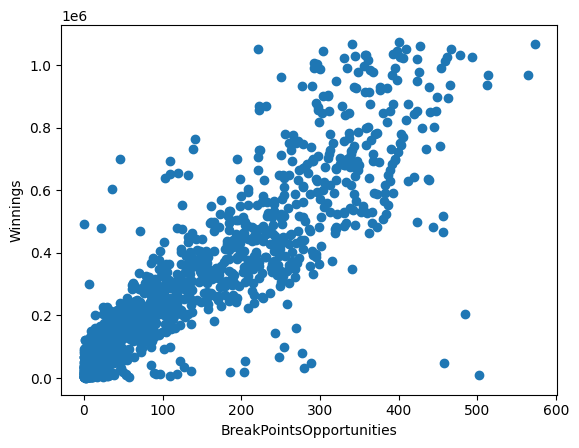

In [200]:
plt.scatter(df['BreakPointsOpportunities'], df['Winnings'])

plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')

plt.show()

This graph suggests a positive correlation between the number of break points opportunities and the winnings of a player.

## Winnings vs Total Points Won

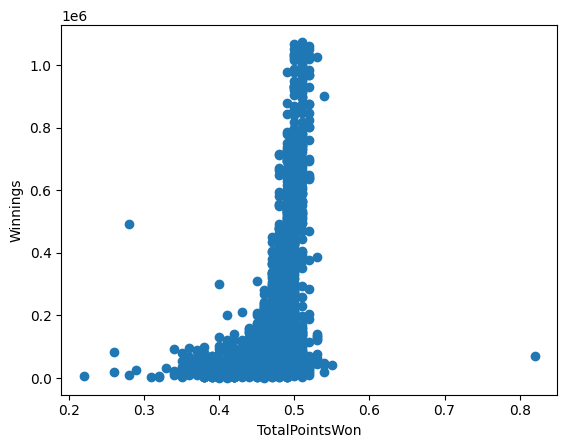

In [201]:
plt.scatter(df['TotalPointsWon'], df['Winnings'])

plt.xlabel('TotalPointsWon')
plt.ylabel('Winnings')

plt.show()

This graph suggests a positive correlation between the total points won and the winnings of a player, but perhaps not as strong as the other two factors.

---

# Single feature linear regressions

Here, we define the features, then we split the data into training and testing sets. We then train each single-feature model using the training data and evaluate its performance using the testing data. Note that the data is split randomly into training and testing sets, so the results vary every time the code is run. Scores are therefore given as ranges when the code is run multiple times.

In [202]:
# Choosing features to predict winnings
features = ['Aces', 'BreakPointsOpportunities', 'TotalPointsWon']
outcomes = {}


In [205]:
# Splitting the data into training and test sets and storing results in dictionaries
for feature in features:
    outcome = 'Winnings'
    feature_train, feature_test, outcome_train, outcome_test = train_test_split(
        df[[feature]], df[outcome], train_size=0.8
    )
    outcomes[feature] = {
        'feature_train': feature_train,
        'feature_test': feature_test,
        'outcome_train': outcome_train.to_frame(),
        'outcome_test': outcome_test.to_frame(),
    }


In [206]:
# Create, train, and score the models
print('Model prediction scores:')
for feature, data in outcomes.items():
    model = LinearRegression()
    model.fit(data['feature_train'], data['outcome_train'])
    score = model.score(data['feature_test'], data['outcome_test'])
    print(f'{feature}: {score:.2f}')


Model prediction scores:
Aces: 0.66
BreakPointsOpportunities: 0.86
TotalPointsWon: 0.20


## Plotting Actual vs Predicted Winnings for each feature

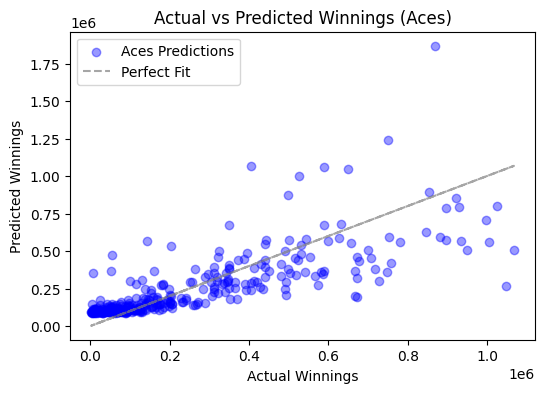

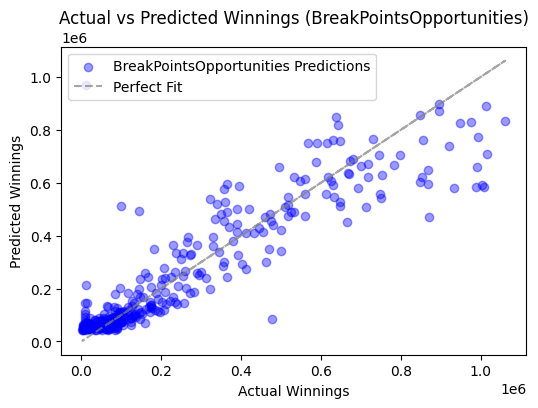

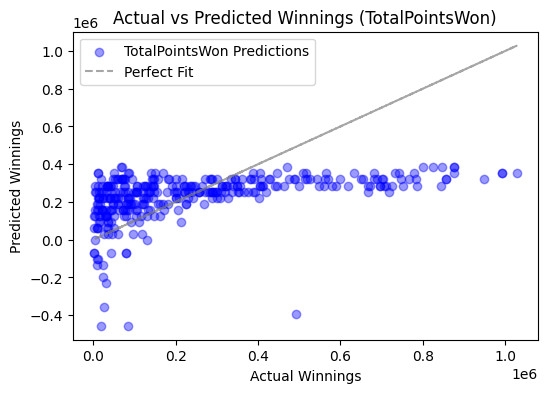

In [ ]:
for feature, data in outcomes.items():
    # Predict using the trained model
    model = LinearRegression()
    model.fit(data['feature_train'], data['outcome_train'])
    predictions = model.predict(data['feature_test'])
    
    # Plot actual vs predicted winnings
    plt.figure(figsize=(6, 4))
    plt.scatter(data['outcome_test'], predictions, alpha=0.4, color='blue', label=f'{feature} Predictions')
    plt.plot(data['outcome_test'], data['outcome_test'], color='gray', linestyle='--', alpha=0.7, label='Perfect Fit')
    
    # Set titles and labels
    plt.xlabel('Actual Winnings')
    plt.ylabel('Predicted Winnings')
    plt.title(f'Actual vs Predicted Winnings ({feature})')
    plt.legend()
    plt.show()


## Conclusions

The scores of each linear regression model show a large variation in the predictive power of each feature. In descending order:
- Break Points Opportunities has the highest score with 80-85%: **good correlation**
- Number of Aces with 55-60%: **moderate correlation**
- Total Points Won with 15-20%: **weak correlation**

For the graphs above we can compare the line against the data points and see that the model under-predicts the winnings of players for low values of each feature, and over-predicts the winnings of players for high values of each feature.

---

#  Two feature linear regressions

Selecting the top two predictors of winnings (Break Points Opportunities and Aces), we create a two feature linear regression model:


In [207]:
feature_pair = df[['BreakPointsOpportunities', 'Aces']]
outcome_pair = df[['Winnings']]

In [208]:
# Splitting the data into training and test sets
feature_pair_train, feature_pair_test, outcome_pair_train, outcome_pair_test = train_test_split(feature_pair, outcome_pair, train_size=0.8)

In [210]:
# Create, train, and score the model
model_pair = LinearRegression()
model_pair.fit(feature_pair_train, outcome_pair_train)
score_pair = model_pair.score(feature_pair_test, outcome_pair_test)
print(f'Model prediction score when fitting with BPO and Aces: {score_pair:.2f}')

Model prediction score when fitting with BPO and Aces: 0.82


## Plotting Actual vs Predicted Winnings for each feature

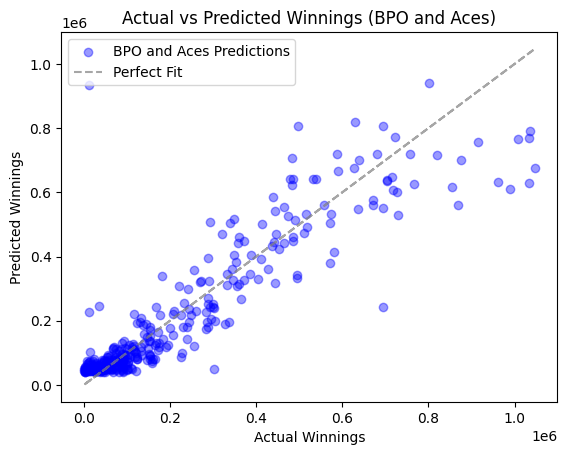

In [77]:
# Plotting Actual vs Predicted Winnings
predictions_pair = model_pair.predict(feature_pair_test)

plt.scatter(outcome_pair_test, predictions_pair, alpha=0.4, color='blue', label='BPO and Aces Predictions')
plt.plot(outcome_pair_test, outcome_pair_test, color='gray', linestyle='--', alpha=0.7, label='Perfect Fit')

plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Actual vs Predicted Winnings (BPO and Aces)')
plt.legend()
plt.show()

## Conclusions

The score for this model is 81-87%, which is marginally better than the single feature linear regression model for Break Points Opportunities. This suggests that the two features when taken together give us better predictive power than when taken individually.

This is supported by the graphs above which show the line of perfect prediction to be a better fit for the data points than the single feature linear regression models. Note that the data points are clustered more evenly above and below.

# Multiple feature linear regressions

Finally, we create a multiple feature linear regression model using as many features as we wish. Features can be added or removed to change the model and improve its predictive power.

In [212]:
feature_multi = df[['BreakPointsOpportunities',
                   'Aces',
                   'ReturnGamesWon',
                   'Wins',
                   'Ranking']]
outcome_multi = df[['Winnings']]

In [183]:
feature_multi_train, feature_multi_test, outcome_multi_train, outcome_multi_test = train_test_split(feature_multi, outcome_multi, train_size=0.8)

In [213]:
# Create, train, and score the model
model_multi = LinearRegression()
model_multi.fit(feature_multi_train, outcome_multi_train)
score_multi = model_multi.score(feature_multi_test, outcome_multi_test)
print(f'Model prediction score when fitting with multiple features: {score_multi:.2f}')

Model prediction score when fitting with multiple features: 0.87


## Plotting Actual vs Predicted Winnings

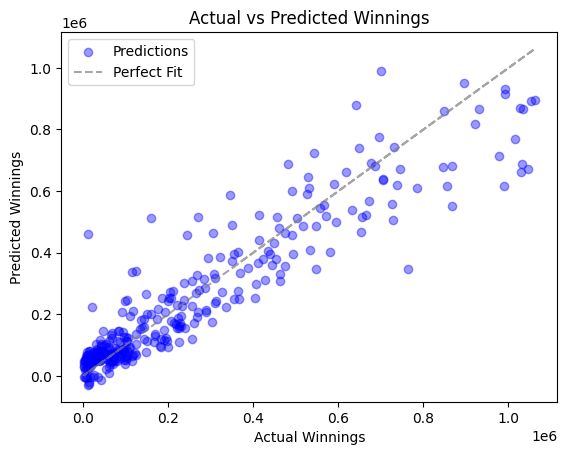

In [215]:
predictions_trio = model_multi.predict(feature_multi_test)

plt.scatter(outcome_multi_test, predictions_trio, alpha=0.4, color='blue', label='Predictions')
plt.plot(outcome_multi_test, outcome_multi_test, color='gray', linestyle='--', alpha=0.7, label='Perfect Fit')

plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Actual vs Predicted Winnings')
plt.legend()
plt.show()

## Conclusions

The score for this model is 83-89%, which is marginally better than the two-feature linear regression model. This suggests that the multi feature model has a higher power of prediction than the two feature model.

Visually, the line of perfect prediction looks to be a better fit for the data points than the two feature linear regression model. This suggests that the multi feature linear regression model is a better predictor of the winnings of a player than the two feature linear regression model.

The multi feature linear regression model is the best predictor of the winnings of a player, with a score of 83-89%. This suggests that the number of aces, break points opportunities, and total points won are highly correlated with the winnings of a player.